<a href="https://colab.research.google.com/github/ClovisMonteiro/Data-solutions/blob/main/Task_2_Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - Walmart Sales Prediction

In this task you are asked to do an exploratory data analysis, feature selection, feature engineering and fit a simple model to predict the sales using the data from Walmart competition at Kaggle

(https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data).

# Import required basics  libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction")

['features.csv', 'test.csv', 'train.csv', 'sampleSubmission.csv', 'stores.csv']

Test

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

In [4]:
test = pd.read_csv("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction/test.csv", sep=',', encoding='utf-8')

In [5]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


Train

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

  - Store - the store number
  - Dept - the department number
  - Date - the week
  - Weekly_Sales -  sales for the given department in the given store
  - IsHoliday - whether the week is a special holiday week

In [6]:
train = pd.read_csv("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction/train.csv", sep=',', encoding='utf-8')

In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Features


This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

  - Store - the store number
  - Date - the week
  - Temperature - average temperature in the region
  - Fuel_Price - cost of fuel in the region
  - MarkDown1-5 - anonymized data related to promotional markdowns that Walmart   is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
  - CPI - the consumer price index
  - Unemployment - the unemployment rate
  - IsHoliday - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Examples:
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [8]:
features = pd.read_csv("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction/features.csv", sep=',', encoding='utf-8')

In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Stores

This file contains anonymized information about the 45 stores, indicating the type and size of store.

In [10]:
stores = pd.read_csv("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction/stores.csv", sep=',', encoding='utf-8')

In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Sample submission


 Example of data format to send

In [12]:
sample_submission = pd.read_csv("./drive/MyDrive/Data_Solutions/Walmart_Sales_Prediction/sampleSubmission.csv", sep=',', encoding='utf-8')


In [13]:
sample_submission.head()

# will not be used in this case

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


### Analyzing data

In [14]:
print("Archive Test: {} rows and {} columns".format(test.shape[0],test.shape[1]))
print("Archive Train: {} rows and {} columns".format(train.shape[0],train.shape[1]))
print("Archive Feature: {} rows and {} columns".format(features.shape[0],features.shape[1]))
print("Archive Stores: {} rows and {} columns".format(stores.shape[0],stores.shape[1]))

Archive Test: 115064 rows and 4 columns
Archive Train: 421570 rows and 5 columns
Archive Feature: 8190 rows and 12 columns
Archive Stores: 45 rows and 3 columns


In [15]:
features.isna().sum().any()


print("Missing values at test? \nR: {}".format(test.isna().sum().any()))
print("Missing values at train? \nR: {}".format(train.isna().sum().any()))
print("Missing values at features? \nR: {}".format(features.isna().sum().any()))
print("Missing values at stores? \nR: {}".format(stores.isna().sum().any()))

Missing values at test? 
R: False
Missing values at train? 
R: False
Missing values at features? 
R: True
Missing values at stores? 
R: False


In [16]:
# Analyzing missing data in features 

features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Analyzing the data

##### the store and feature files should be joined to the train and test datasets 

In [17]:
# test
train_new = pd.merge(train, stores, on='Store', how='outer', indicator=True) 
train_new.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', '_merge_Train_store']
train_new_feat = pd.merge(train_new, features, on=['Store', 'Date', 'IsHoliday'], how='outer', indicator=True) 


In [18]:
train_new_feat.shape, train_new.shape, train.shape, stores.shape

((423325, 18), (421570, 8), (421570, 5), (45, 3))

In [19]:
train_new['_merge_Train_store'].value_counts()

both          421570
right_only         0
left_only          0
Name: _merge_Train_store, dtype: int64

In [20]:
train_new_feat['_merge'].value_counts()

both          421570
right_only      1755
left_only          0
Name: _merge, dtype: int64

In [21]:
#Change dataframes train e test

# Train
df_train = train.merge(stores, how='left', on='Store')
df_train = df_train.merge(features, how='left', on=['Store', 'Date', 'IsHoliday'])

# Test 
df_test = test.merge(stores, how='left', on='Store')
df_test = df_test.merge(features, how='left', on=['Store', 'Date', 'IsHoliday'])


In [22]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [23]:
df_train.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5'], inplace=True)
df_test.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5'], inplace=True)



In [24]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573


In [25]:
# Change formatc of Date
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%Y-%m-%d')
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%Y-%m-%d')

In [26]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [27]:
# convert date for week and year
# References: https://docs.python.org/3/library/datetime.html

df_train['week'] = df_train['Date'].dt.isocalendar().week
df_test['week'] = df_test['Date'].dt.isocalendar().week

df_train['year'] = df_train['Date'].dt.isocalendar().year
df_test['year'] = df_test['Date'].dt.isocalendar().year

In [28]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,9,2010


In [29]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
week,421570.0,25.826762,14.151887,1.000,14.000000,26.00000,38.000000,52.000000
year,421570.0,2010.968591,0.796876,2010.000,2010.000000,2011.00000,2012.000000,2012.000000


In [30]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,44,2012
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573,45,2012
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573,46,2012
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573,47,2012
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573,48,2012


In [31]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,115064.0,22.238207,12.809930,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,115064.0,44.339524,30.656410,1.000000,18.000000,37.000000,74.000000,99.000000
Size,115064.0,136497.688921,61106.926438,34875.000000,93638.000000,140167.000000,202505.000000,219622.000000
Temperature,115064.0,53.941804,18.724153,-7.290000,39.820000,54.470000,67.350000,101.950000
Fuel_Price,115064.0,3.581546,0.239442,2.872000,3.431000,3.606000,3.766000,4.125000
CPI,76902.0,176.961347,41.239967,131.236226,138.402033,192.304445,223.244532,228.976456
Unemployment,76902.0,6.868733,1.583427,3.684000,5.771000,6.806000,8.036000,10.199000
week,115064.0,23.050963,15.750407,1.000000,10.000000,20.000000,30.000000,52.000000
year,115064.0,2012.767182,0.422629,2012.000000,2013.000000,2013.000000,2013.000000,2013.000000


In [32]:
df_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'week', 'year'],
      dtype='object')

In [33]:
df_test['IsHoliday'].value_counts()

False    106136
True       8928
Name: IsHoliday, dtype: int64

In [34]:
df_train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,2012
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [35]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
year            0
dtype: int64

In [36]:
df_test.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
week                0
year                0
dtype: int64

In [37]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [38]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
year            0
dtype: int64

In [39]:
df_test.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
year            0
dtype: int64

In [40]:
df_test.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
year            0
dtype: int64

### applying treatment for the holliday

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [41]:
df_train['Type'] = df_train['Type'] .apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
df_train = df_train.dropna()

In [42]:
df_train_test_date = df_train.query("'1' in IsHoliday ")

In [43]:
df_train_test_date['week'].value_counts()

6     8895
36    8861
47    5959
52    5946
Name: week, dtype: Int64

applying new values in column holliday

0 - not a holiday
- Holidays:

  - 1 - SuperBowl - column week = value 6 
  - 2 - LaborDay - column week = value 36
  - 3 - Thanksgiving - column week = value 47
  - 4 - Christmas - column week = value 52

In [44]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,3,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,3,151315,38.51,2.548,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,3,151315,39.93,2.514,211.289143,8.106,7,2010
3,1,1,2010-02-26,19403.54,False,3,151315,46.63,2.561,211.319643,8.106,8,2010
4,1,1,2010-03-05,21827.90,False,3,151315,46.50,2.625,211.350143,8.106,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2,118221,64.88,3.997,192.013558,8.684,39,2012
421566,45,98,2012-10-05,628.10,False,2,118221,64.89,3.985,192.170412,8.667,40,2012
421567,45,98,2012-10-12,1061.02,False,2,118221,54.47,4.000,192.327265,8.667,41,2012
421568,45,98,2012-10-19,760.01,False,2,118221,56.47,3.969,192.330854,8.667,42,2012


In [45]:
df_train.loc[(df_train['IsHoliday']== 1) & (df_train['week']==6) , 'IsHoliday']= '1'
df_train.loc[(df_train['IsHoliday']== 1) & (df_train['week']==36) , 'IsHoliday']= '2'
df_train.loc[(df_train['IsHoliday']== 1) & (df_train['week']==47) , 'IsHoliday']= '3'
df_train.loc[(df_train['IsHoliday']== 1) & (df_train['week']==52) , 'IsHoliday']= '4'
df_train.loc[(df_train['IsHoliday']== 0) , 'IsHoliday']= '0'

In [46]:
df_train['IsHoliday'].value_counts()

0    391909
1      8895
2      8861
3      5959
4      5946
Name: IsHoliday, dtype: int64

In [47]:
df_test.loc[(df_test['IsHoliday']== 1) & (df_test['week']==6) , 'IsHoliday']= '1'
df_test.loc[(df_test['IsHoliday']== 1) & (df_test['week']==36) , 'IsHoliday']= '2'
df_test.loc[(df_test['IsHoliday']== 1) & (df_test['week']==47) , 'IsHoliday']= '3'
df_test.loc[(df_test['IsHoliday']== 1) & (df_test['week']==52) , 'IsHoliday']= '4'
df_test.loc[(df_test['IsHoliday']== 0) , 'IsHoliday']= '0'

In [48]:
df_test['IsHoliday'].value_counts()

0    106136
4      2988
3      2976
1      2964
Name: IsHoliday, dtype: int64

In [56]:
df_train_year = df_train.groupby(by=['year']).mean('Weekly_Sales').copy()
df_test_year = df_test.groupby(by=['year']).mean('Weekly_Sales').copy()

In [52]:
df_train_year

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week
year,,,,,,,,,,
2010,22.151629,44.147428,16270.275737,2.413331,137114.339176,59.659916,2.823858,167.727885,8.446427,28.486512
2011,22.206350,44.217787,15954.070675,2.410282,136683.560510,58.220745,3.563353,171.181195,8.036353,26.582354
2012,22.247556,44.436149,15694.948597,2.406276,136354.752162,62.815807,3.710378,175.061958,7.332047,21.980822


In [57]:
df_test_year

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,week
year,,,,,,,,
2012,22.205681,44.470006,136446.342267,46.592112,3.496374,176.420286,6.944982,48.010527
2013,22.248077,44.299926,136513.271198,56.172230,3.607394,100.623715,3.876184,15.476432


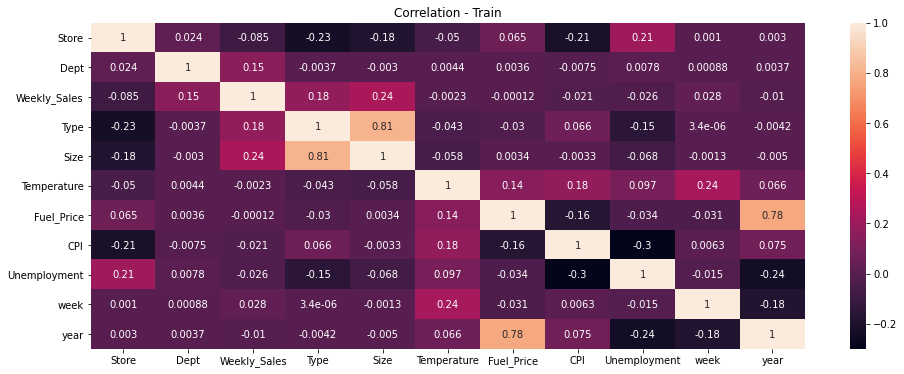

In [59]:
plt.figure(figsize=(16, 6))
plt.title("Correlation - Train")
sns.heatmap(df_train.corr(), annot=True)

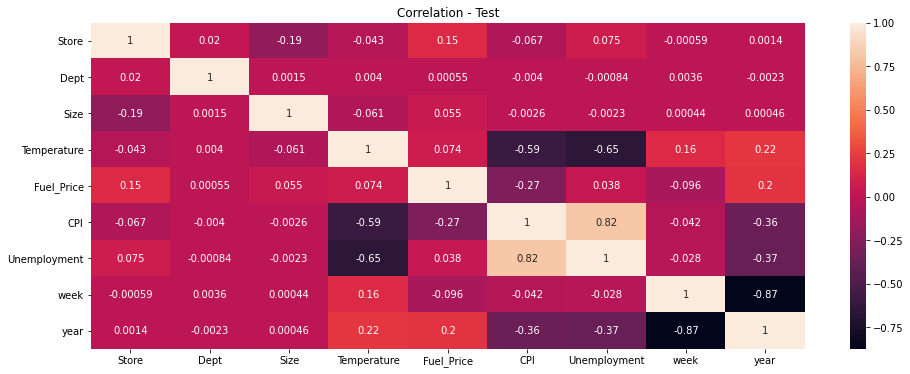

In [60]:
plt.figure(figsize=(16, 6))
plt.title("Correlation - Test")
sns.heatmap(df_test.corr(), annot=True)

In [61]:
df_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'week', 'year'],
      dtype='object')

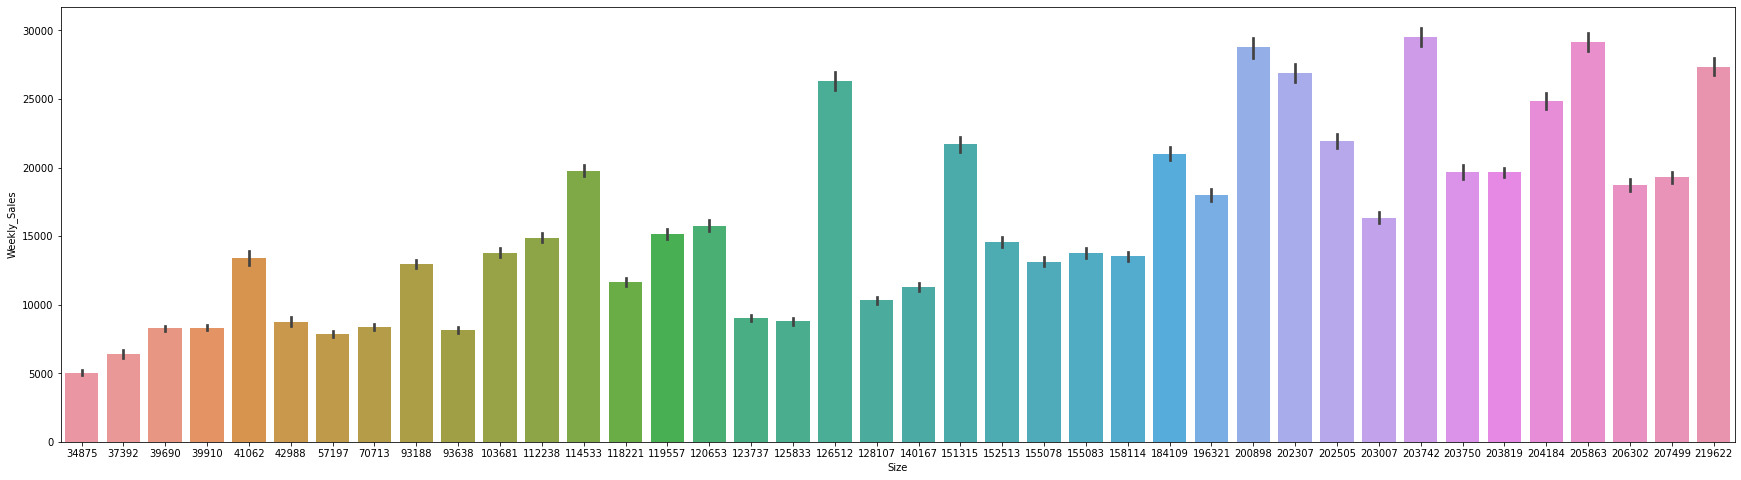

In [62]:
plt.figure(figsize=(30,8))
sns.barplot(x='Size', y='Weekly_Sales', data=df_train)

Text(0, 0.5, 'value ')

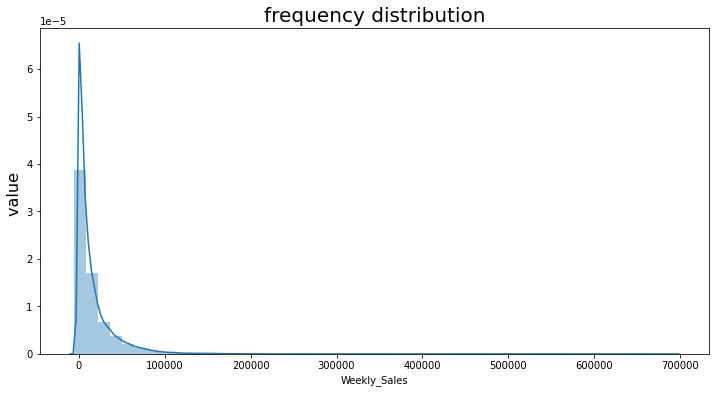

In [63]:
ax = sns.distplot(df_train['Weekly_Sales'])
ax.figure.set_size_inches(12,6)
ax.set_title('frequency distribution', fontsize=20)
ax.set_ylabel('value ', fontsize=16)

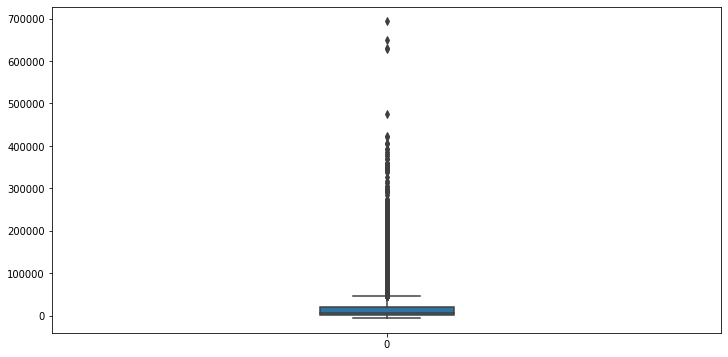

In [64]:
ax = sns.boxplot(data = df_train['Weekly_Sales'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax

# the data have outliers

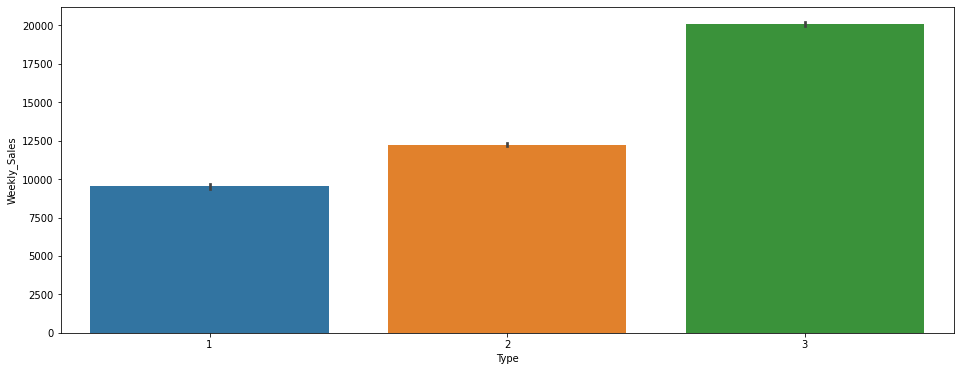

In [65]:
plt.figure(figsize=(16,6))
sns.barplot(x='Type', y='Weekly_Sales', data=df_train)


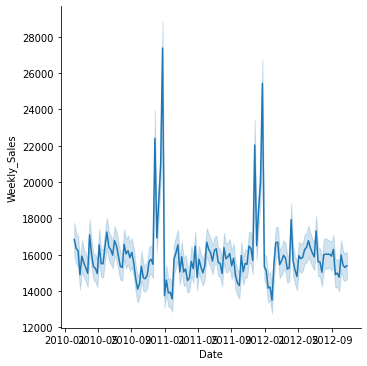

In [77]:
sns.relplot(x='Date', y='Weekly_Sales', data=df_train,kind="line")

### Supervised learning

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
y = df_train['Weekly_Sales']

X = df_train.drop(['Weekly_Sales', 'Date'], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((337256, 11), (84314, 11), (337256,), (84314,))

In [82]:
print("X_train: {} rows and {} columns".format(X_train.shape[0],X_train.shape[1]))
print("X_test: {} rows and {} columns".format(X_test.shape[0],X_test.shape[1]))
print("y_train: {} rows and 1 column".format(y_train.shape[0]))
print("y_test: {} rows and 1 column".format(y_test.shape[0]))


X_train: 337256 rows and 11 columns
X_test: 84314 rows and 11 columns
y_train: 337256 rows and 1 column
y_test: 84314 rows and 1 column


### Starting Model Estimation process

In [83]:
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
model = RandomForestRegressor(n_estimators=100)

In [90]:
model.fit(X_train, y_train)

# ERROR: float() argument must be a string or a number, not 'Timestamp'  - Fixed
# ERROR: could not convert string to float: 'B' - Fixed
# Test 1 with LinearRegression failed R²=0,08
# Long time (6 // 10 min) for process this model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Generating predictions for TEST data (X_test) using the predict() method

In [91]:
y_pred = model.predict(X_test)

### Analyzing results

Regression model evaluation metrics

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

Font info: https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html

In [92]:
print("Random Forest Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_Score:",r2_score(y_test,y_pred))

Random Forest Regressor
MAE: 1413.3237585110421
MSE: 12098384.514711166
RMSE: 3478.273208750452
r2_Score: 0.9764988093301564


Reading the literature, this values are good

# Save Model

In [93]:
# Save model using picle
import pickle

output = open('Walmart_Sales_Prediction', 'wb')
pickle.dump(model, output)
output.close()

# Load model in other jupyter notebook

In [96]:
import pickle

model = open('Walmart_Sales_Prediction','rb')
model_import = pickle.load(model)
model.close()

In [97]:
# Predict

#       model_import.predict(´´´input data here´´´)